This notebook focusses on the translation of gaussian stochastic proccesses to lognormal stochastic processes. Firstly, the sample generation code is presented details of which can be found in 'SRM.ipynb'.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

T = 100  # Total time
nt = 256  # Num of Discretized Time
dt = T / nt

F = 1 / T * nt / 2  # Frequency.(Hz)
nw = 128  # Num of Discretized Freq.
dw = F / nw
t_u = 2*np.pi/2/F
if dt>t_u:
    print('Error (aliasing)')

# Generation of Input Data(Stationary)
t = np.linspace(0, T - dt, nt)
w = np.linspace(0, F - dw, nw)

# Compute the power spectral density S(w) at various points frequencies w
S = 125 / 4 * w ** 2 * np.exp(-5 * w)
n_sim = 1000

from UQpy.StochasticProcess import SRM
SRM_object = SRM(n_sim, S=S, dw=dw, nt=nt, nw=nw, case='uni')
samples = SRM_object.samples

The autocorrelation function of the power spectrum is plotted below.

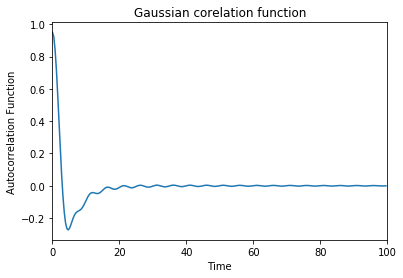

In [3]:
from UQpy.Utilities import *

R_g = S_to_R(S, w, t)

fig3 = plt.figure()
plt.plot(t, R_g)
plt.xlabel('Time')
plt.ylabel('Autocorrelation Function')
plt.xlim(0, 100)
plt.title('Gaussian corelation function')
plt.show()

The gaussian sample are converted to lognormal samples using the Traslation class avaialble in the StochasticProcess module of UQpy

In [4]:
from UQpy.StochasticProcess import Translation

Translate_object = Translation('lognormal', [0.5, 0, np.exp(0.5)], dt, dw, nt, nw, S_g=S, samples_g=SRM_object.samples)
samples_ng = Translate_object.samples_ng
samples_ng = samples_ng - np.mean(samples_ng)
R_ng = Translate_object.R_ng
r_ng = Translate_object.r_ng

The lognormal autocorrelation function is plotted below

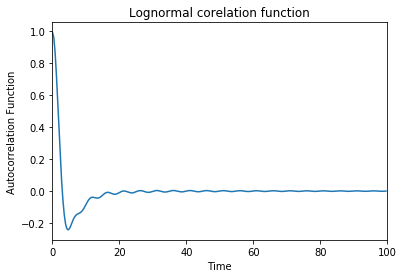

In [5]:
fig4 = plt.figure()
plt.plot(t, R_ng)
plt.xlabel('Time')
plt.ylabel('Autocorrelation Function')
plt.xlim(0, 100)
plt.title('Lognormal corelation function')
plt.show()

The gaussian and lognormal samples are plotted along each other

/usr/local/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


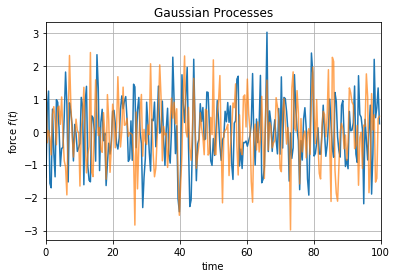

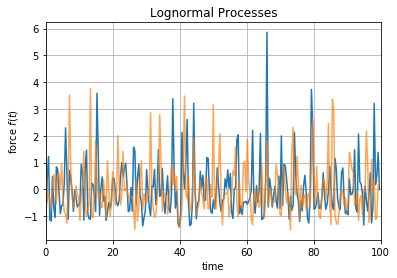

In [6]:
fig5 = plt.figure()
for j in range(2):
    plt.plot(t, SRM_object.samples[j], alpha=1.-j*0.3)
plt.xlim(0, 100)
plt.xlabel('time')
plt.ylabel('force $f(t)$')
plt.grid('on', which='both')
plt.title('Gaussian Processes')
plt.show()

fig6 = plt.figure()
for j in range(2):
    plt.plot(t, samples_ng[j], alpha=1.-j*0.3)
plt.xlim(0, 100)
plt.xlabel('time')
plt.ylabel('force $f(t)$')
plt.grid('on', which='both')
plt.title('Lognormal Processes')
plt.show()

Next, we identify the gaussian corelation function which upon translation yields the lognormal corelation

In [7]:
from UQpy.StochasticProcess import InverseTranslation

Inverse_translate_object = InverseTranslation('lognormal', [0.5, 0, np.exp(0.5)], dt, dw, nt, nw, R_ng=R_ng)
R_g_inv = Inverse_translate_object.R_g

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [ ]:
fig4 = plt.figure()
plt.plot(t, R_g_inv)
plt.xlabel('Time')
plt.ylabel('Autocorrelation Function')
plt.xlim(0, 100)
plt.title('Lognormal corelation function')
plt.show()